**NOTE: This pdf contains code and plots only. Please refer to word document for insights and recommendations.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests

url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv'
response = requests.get(url)
with open('netflix.csv', 'wb') as file:
    file.write(response.content)


In [3]:
import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv('netflix.csv')

# **Analysing basic metrics**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.shape

(8807, 12)

**Dataset Size:** The dataset consists of 8807 rows and 12 columns

**Data Types:** Most of the columns are of the object data type, which typically represents strings or mixed data types. The release_year column is of the int64 data type, indicating it contains integer values.

**Missing Values:** Some columns have missing values. The director column has 6173 non-null values, indicating that there are missing values for approximately 2634 entries. Similarly, the cast, country, date_added, rating, duration columns also have missing values to a lesser extent

In [7]:
df.isnull().sum() #Total null values in each column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
round(100*df.isnull().sum()/len(df.index),2) #PERCENTAGE OF NULL DATA

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

**column director has the maximum null values (29.91%), cast and country also have many null values.Let's remove or fill these null values to make our data non-null**

In [9]:
# removing rows having null data for columns "rating", "date" and "duration"
# as they have very less pecentage of null data and removing them won't afffect much to our dataset.

df = df[~pd.isnull(df['rating'])]
df = df[~pd.isnull(df['date_added'])]
df = df[~pd.isnull(df['duration'])]

#filling the null values with "unknow" for columns "director","cast" and "country".

df.director.fillna('unknown', inplace=True)
df.cast.fillna('unknown', inplace=True)
df.country.fillna('unknown',inplace=True)

round(100*df.isnull().sum()/len(df.index),2)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

**Got the dataset with 0 null values**



# **Analysis of categorical variable both using graphical and non graphical analysis**

In [10]:
# NON GRAPHICAL ANALYSIS
columns = ['director','country','rating','listed_in', 'type']
for column in columns:
    # Check if the column is categorical
    if df[column].dtype == 'object':
        print("Column:", column)
        print(df[column].value_counts()[0:10]) #Getting only the top 10 values in each category
        print("--------------------")

Column: director
director
unknown                   2621
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Jay Chapman                 12
Youssef Chahine             12
Name: count, dtype: int64
--------------------
Column: country
country
United States     2809
India              972
unknown            829
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64
--------------------
Column: rating
rating
TV-MA    3205
TV-14    2157
TV-PG     861
R         799
PG-13     490
TV-Y7     333
TV-Y      306
PG        287
TV-G      220
NR         79
Name: count, dtype: int64
--------------------
Column: listed_in
listed_in
Dramas, International Movies                        362
Documentaries          

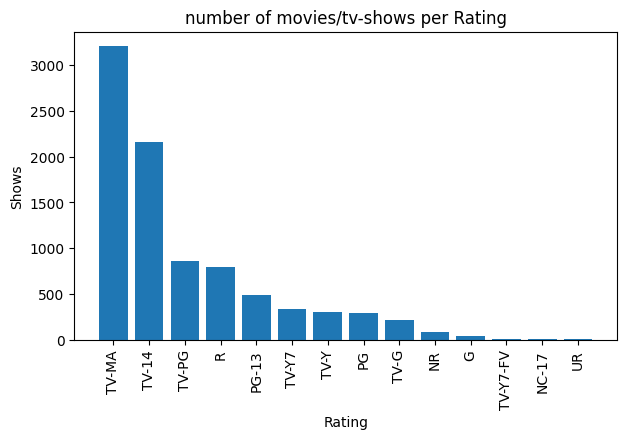

In [11]:
# GRAPHICAL ANALYSIS for rating column:

cnt = df['rating'].value_counts()
x = cnt.index
y = cnt
plt.figure(figsize=(7,4))
plt.bar(x,y)
plt.title("number of movies/tv-shows per Rating")
plt.xlabel("Rating")
plt.ylabel("Shows")
plt.xticks(rotation=90)
plt.show()



**maximum shows/movies come under the category: 'TV-MA': Mature audience only**

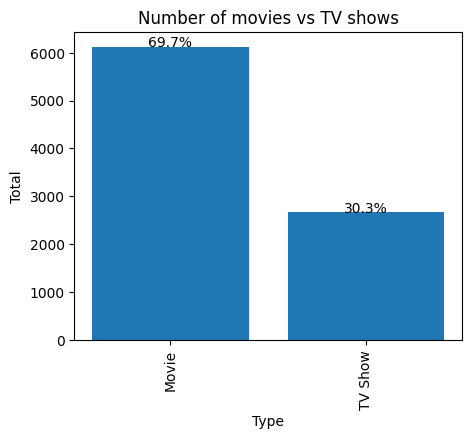

In [12]:
# GRAPHICAL ANALYSIS for type column:

cnt = df['type'].value_counts()
x = cnt.index
y = cnt
total = sum(y)
percentages = [count/total * 100 for count in y]
plt.figure(figsize=(5,4))
plt.bar(x,y)
# Add percentage labels
for i, percentage in enumerate(percentages):
    plt.text(i, y[i] + 5, f"{percentage:.1f}%", ha="center")
plt.title("Number of movies vs TV shows")
plt.xlabel("Type")
plt.ylabel("Total")
plt.xticks(rotation=90)
plt.show()

**Percentage of movies is 69.7% which is far more than percentage of TV shows(30.3%) on Netflix platform**

**Since we have lot of data in "country" column, lets plot graph for top 10 countries producing movies/shows.**

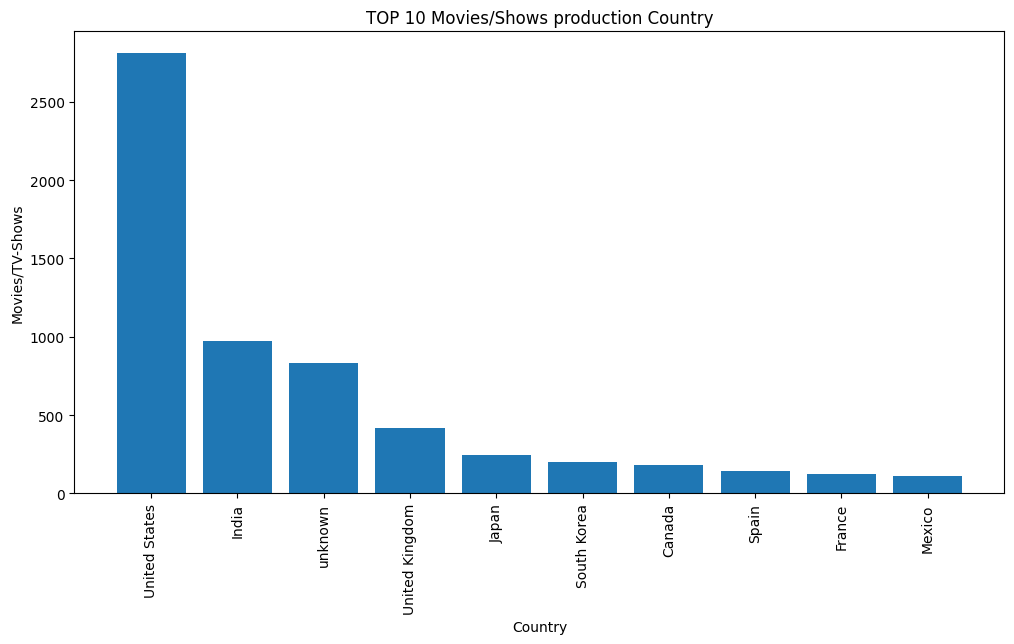

In [13]:
# GRAPHICAL ANALYSIS for Country column:
con = df['country'].value_counts()[0:10]
x=con.index
y=con
plt.figure(figsize=(12,6))
plt.bar(x,y)
plt.title("TOP 10 Movies/Shows production Country")
plt.xlabel("Country")
plt.ylabel("Movies/TV-Shows")
plt.xticks(rotation=90)
plt.show()


**this graph shows that US contributes to maximum shows in netflix followed by India**

# **Comparison of tv shows vs. movies**

**number of tv shows vs movies produced in each country. Pick the top 10 countries**

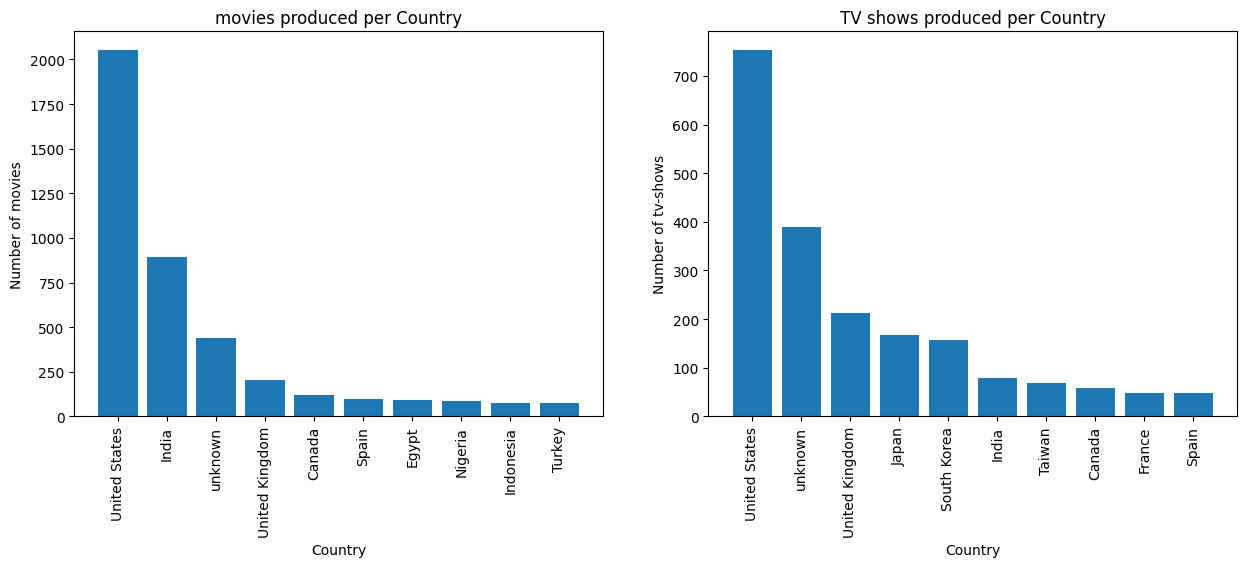

In [14]:
#Analysing only for movies:
df_movies = df[df.type=='Movie']
max_shows_country = pd.DataFrame(df_movies.groupby('country')['show_id'].count().sort_values(ascending=False).reset_index()).iloc[0:10,0].to_list()
df_movies = df_movies[df_movies.country.isin(max_shows_country)]
cnt = df_movies['country'].value_counts()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(cnt.index,cnt)
plt.title("movies produced per Country")
plt.xlabel("Country")
plt.ylabel("Number of movies")
plt.xticks(rotation=90)

#Analysing only for tv-shows:
df_tv = df[df.type=='TV Show']
max_shows_country = pd.DataFrame(df_tv.groupby('country')['show_id'].count().sort_values(ascending=False).reset_index()).iloc[0:10,0].to_list()
df_tv = df_tv[df_tv.country.isin(max_shows_country)]
cnt = df_tv['country'].value_counts()
plt.subplot(1,2,2)
plt.bar(cnt.index,cnt)
plt.title("TV shows produced per Country")
plt.xlabel("Country")
plt.ylabel("Number of tv-shows")
plt.xticks(rotation=90)
plt.show()


**Plots for movies and tv shows produced by country, shows that US produces the most number of movies and tv shows. India stands 2nd in movies production but 6th in tv shows. Japan and South Korea are in top 5 contributors for tv shows**

**Lets see combined result of tv-show v/s movies for countries:**

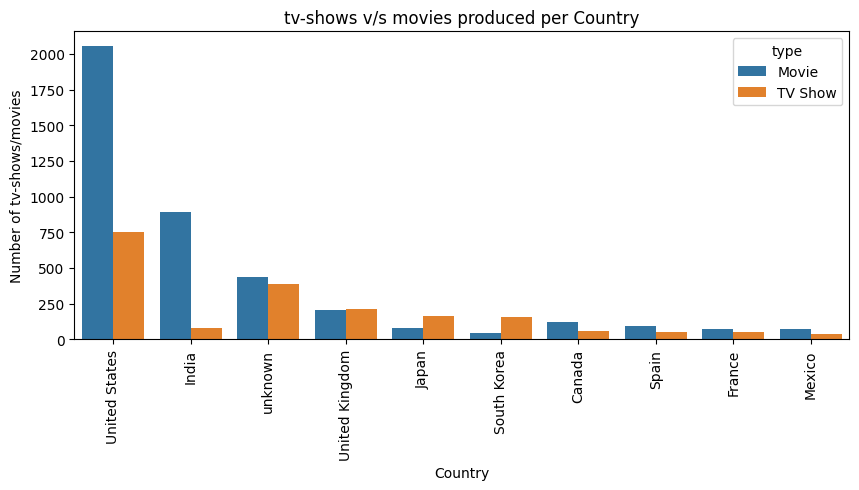

In [15]:
data = df.copy()
# using group-by country and getting unique show count
max_shows_country = pd.DataFrame(data.groupby('country')['show_id'].count().sort_values(ascending=False).reset_index()).iloc[0:10,0].to_list()
# filtering top 10 countries data only
data = data[data.country.isin(max_shows_country)]
counts = data.groupby(['country', 'type']).size().sort_values(ascending=False).reset_index(name='count')
plt.figure(figsize=(10, 4))
sns.barplot(x='country', y='count', hue='type', data=counts)
plt.title("tv-shows v/s movies produced per Country")
plt.xlabel("Country")
plt.ylabel("Number of tv-shows/movies")
plt.xticks(rotation=90)
plt.show()

**US leading both in movies and tv-shows**

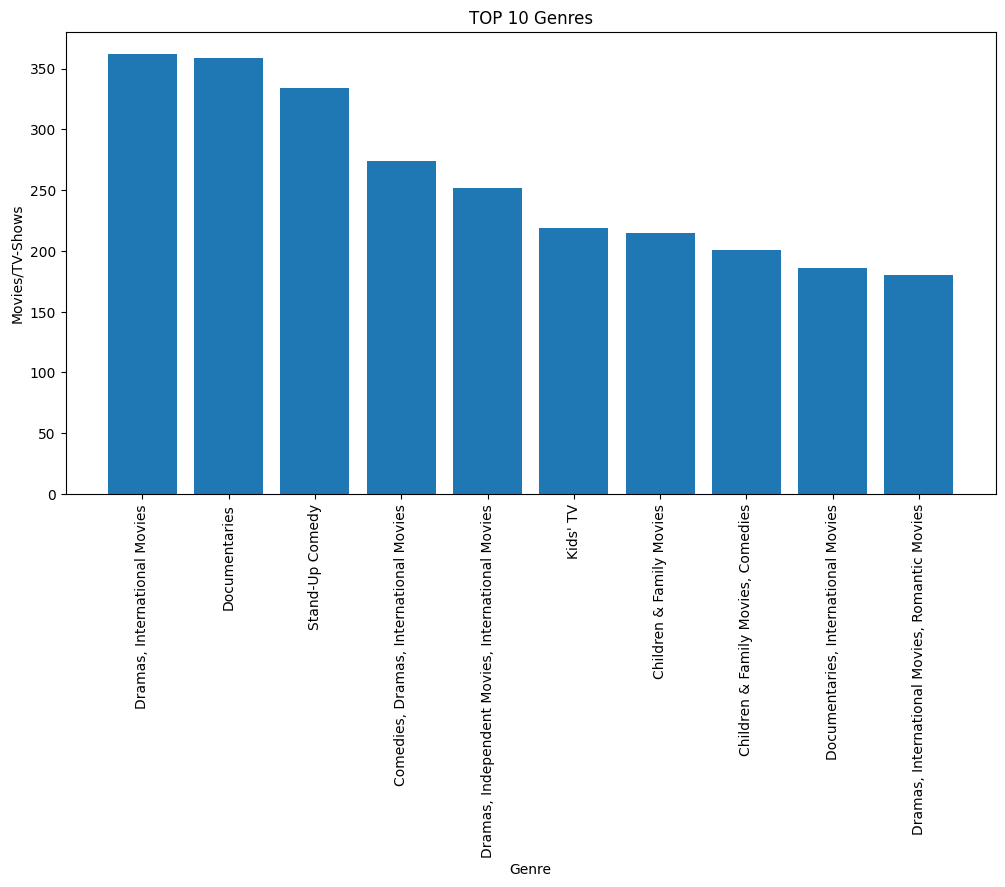

In [16]:
# GRAPHICAL ANALYSIS for "listed_in" column:
con = df['listed_in'].value_counts()[0:10]
x=con.index
y=con
plt.figure(figsize=(12,6))
plt.bar(x,y)
plt.title("TOP 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Movies/TV-Shows")
plt.xticks(rotation=90)
plt.show()

***Top Genres for Movies/TV shows include: Dramas, International Movies and Documentaries.***

## **Trend of movies/TV shows released per year over the last 20-30 years?**

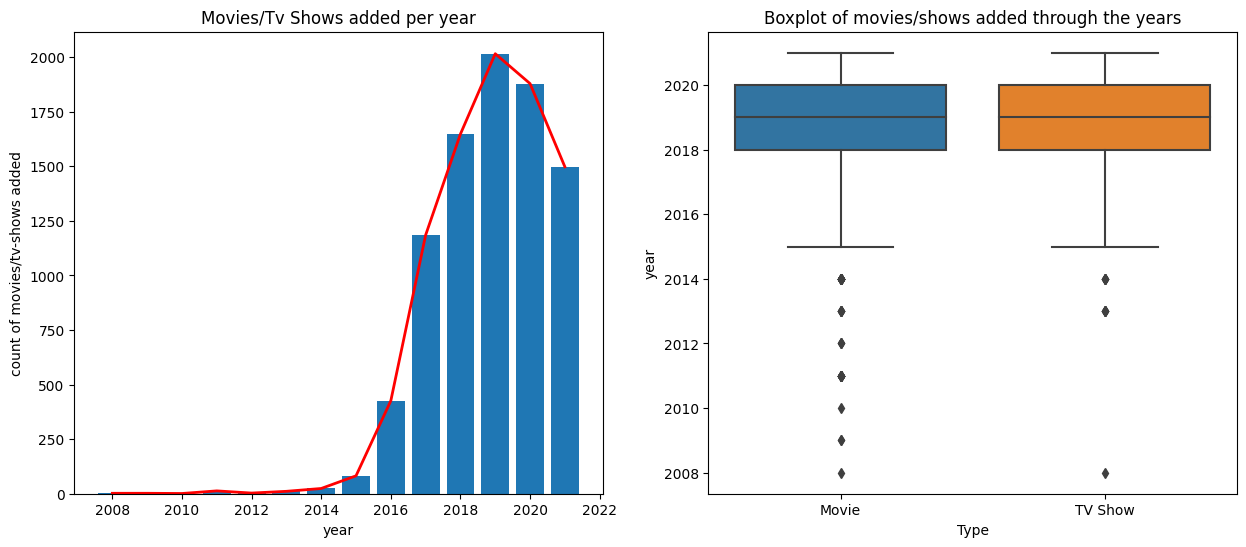

In [20]:
df['date_added'] = df['date_added'].str.replace(r'^\s+', '', regex=True)  # Remove leading space before day
df['year'] = pd.to_datetime(df['date_added'], format="%B %d, %Y").dt.year


yr = df.groupby('year')['show_id'].nunique()
x = yr.index
y = yr
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.bar(x,y)
plt.plot(y, color='red', linewidth=2)
plt.title("Movies/Tv Shows added per year")
plt.xlabel("year")
plt.ylabel("count of movies/tv-shows added")

# Plotting the boxplot
plt.subplot(1,2,2)
sns.boxplot(data=df, x='type', y='year')
plt.xlabel('Type')
plt.ylabel('year')
plt.title('Boxplot of movies/shows added through the years')

plt.show()

***This plot shows that production increased from 2016 till 2019, with maximum production in 2019. There is a decline in production after 2019. From the boxplot, we can see that tv-show production was less compared to movies earlier but increased from 2018 to 2020***

# **Does Netflix has more focus on TV Shows than movies in recent years**

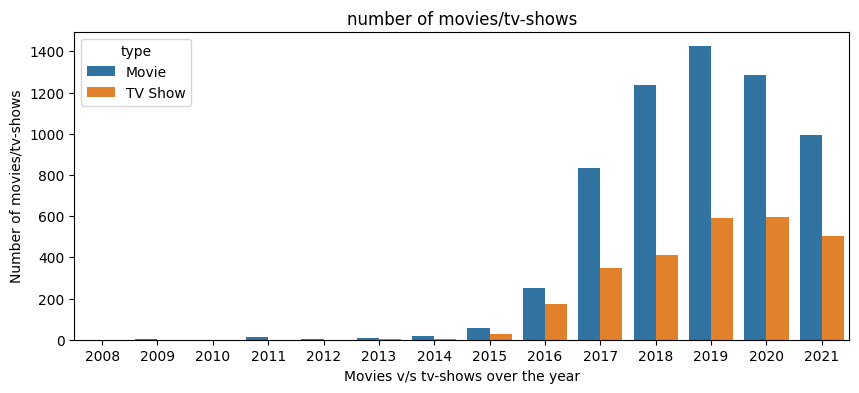

In [21]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='year', hue='type')
plt.xlabel("Movies v/s tv-shows over the year")
plt.ylabel("Number of movies/tv-shows")
plt.title("number of movies/tv-shows")
plt.show()

***Although more tv-shows are getting added in recent years, we can see that still number of movies are leading in the chart.***

## **What is the best time to launch a Movie/TV show?**


**best week to release a Tv-show or movie**

In [22]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


In [24]:
# df_week = df.copy()
# import datetime

# date_format = "%B %d, %Y"
# date = datetime.datetime.strptime(df_week['date_added'], date_format)

# df_week['week'] = pd.to_datetime(df_week['date_added']).dt.week

# #FOR TV-SHOW
# TV = df_week[df_week['type']=='TV Show'].groupby('week')['show_id'].nunique().sort_values(ascending=False)
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# sns.lineplot(x=TV.index,y=TV.values, data=TV)
# plt.text(27,max(TV.values),"maximum TV shows")
# plt.title("Tv Shows added week")
# plt.xlabel("week")
# plt.ylabel("number of tv-shows")

# #FOR MOVIE
# TV = df_week[df_week['type']=='Movie'].groupby('week')['show_id'].nunique().sort_values(ascending=False)
# plt.subplot(1,2,2)
# sns.lineplot(x=TV.index,y=TV.values, data=TV)
# plt.text(1,max(TV.values),"maximum movies")
# plt.title("movies added week")
# plt.xlabel("week")
# plt.ylabel("number of movies")
# plt.show()


***TV-shows showing spike during random weeks - maximum at 27th week whereas
Movies are maximum added in 1st week, i.e, start of the year.***

**best month to release a Tv-show or movie**

month
12    265
Name: show_id, dtype: int64
month
7    565
Name: show_id, dtype: int64


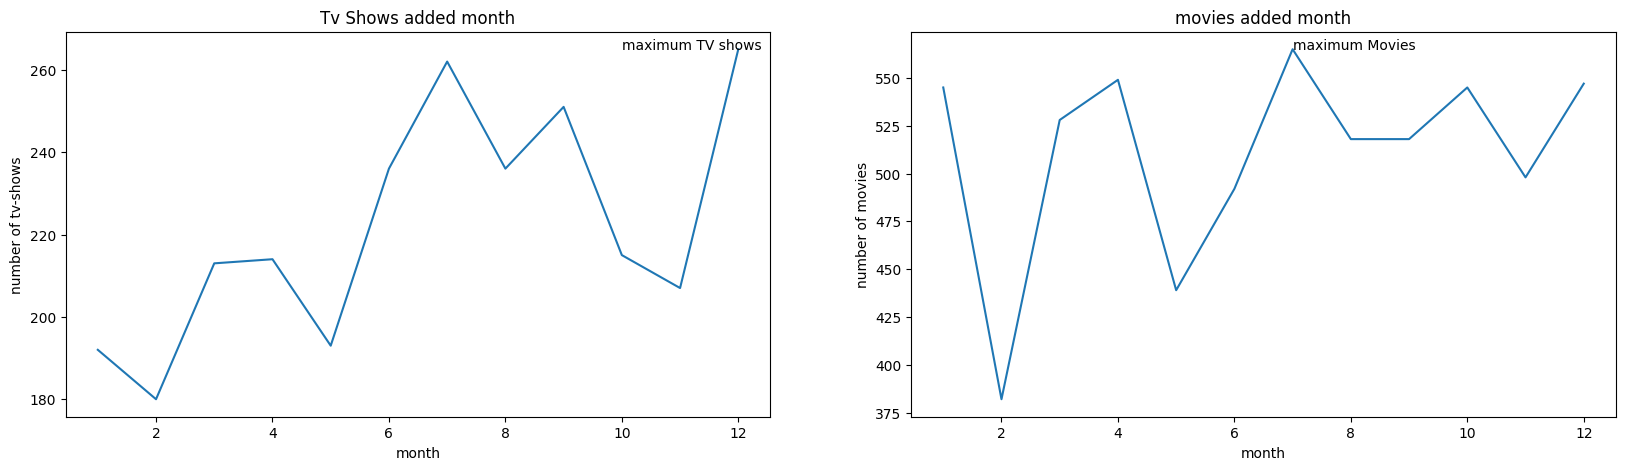

In [25]:
df_month = df.copy()
df_month['month'] = pd.to_datetime(df_month['date_added']).dt.month

#FOR TV-SHOW
TV = df_month[df_month['type']=='TV Show'].groupby('month')['show_id'].nunique().sort_values(ascending=False)
print(TV[TV.values==max(TV.values)])

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.lineplot(x=TV.index,y=TV.values, data=TV)
plt.text(10,max(TV.values),"maximum TV shows")
plt.title("Tv Shows added month")
plt.xlabel("month")
plt.ylabel("number of tv-shows")

#FOR MOVIE
TV = df_month[df_month['type']=='Movie'].groupby('month')['show_id'].nunique().sort_values(ascending=False)
print(TV[TV.values==max(TV.values)])
plt.subplot(1,2,2)
sns.lineplot(x=TV.index,y=TV.values, data=TV)
plt.text(7,max(TV.values),"maximum Movies")
plt.title("movies added month")
plt.xlabel("month")
plt.ylabel("number of movies")
plt.show()

***maximum tv shows are added at 12th month which means at year end, followed by 6th-7th month . Maximum movies are added at around 7th month of the year. Many movies are added in 1st, 4th,10th and 12th months also***

***Other than weeks and months, exploring the data to see if shows are added in special occations such as New-year, weekends, Summer Holidays***

In [26]:
# To find best time to launch tv show, lets divide the "date_added" column into categories like
# Weekend - Friday, Saturday and Sunday, Christmas/New year - December month, Summer - May to August
def launchTime(dt):
  if dt.weekday() in [4,5,6]:
    return 'Weekend'
  elif dt.month == 12:
    return 'Christmas/New Year'
  elif dt.month >=5 and dt.month <=8:
    return 'Summer'
  else:
    return 'other'

df['launchTime'] = pd.to_datetime(df['date_added']).apply(launchTime)

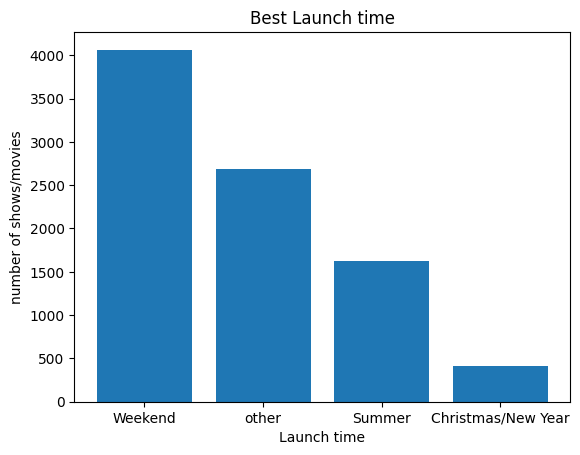

In [27]:
TV = df.groupby('launchTime')['show_id'].nunique().sort_values(ascending=False)
plt.bar(TV.index, TV)
plt.xlabel("Launch time")
plt.ylabel("number of shows/movies")
plt.title("Best Launch time")
plt.show()

***This plot shows that most movies/shows are released on weekends i.e., Firday/Saturday/Sunday. Many movies/shows are released in Summer months as well***

# **Analysis of actors/directors of different types of shows/movies.**

***Here, I am un-nesting the actors and directors column as it contains a comma separated list.***

***top 10 actors:***

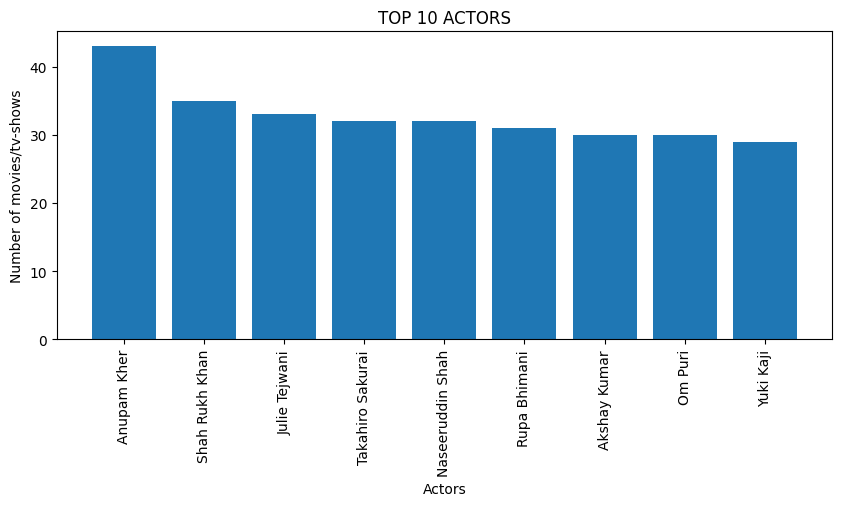

In [28]:
df_actors =df.copy()
df_actors['actors'] = df_actors.apply(lambda x: x['cast'].split('...')[0], axis=1) #THIS WILL FORM THE WHOLE LIST OF CAST IN A NEW COLUMN
df_actors['actors'] = df_actors.apply(lambda x: x['actors'].split(', '), axis=1)
df_actors = df_actors.explode('actors').reset_index(drop=True)
topActors = df_actors.groupby('actors')['show_id'].nunique().sort_values(ascending=False)[1:10] #FILTERING TOP 10 ACTORS
topActors = df_actors.groupby('actors').size().sort_values(ascending=False)[1:10]
plt.figure(figsize=(10,4))
plt.bar(topActors.index, topActors.values)
plt.xticks(rotation=90)
plt.xlabel("Actors")
plt.ylabel("Number of movies/tv-shows")
plt.title("TOP 10 ACTORS")
plt.show()

***Wow! Indian actors are at the top. Anupam Kher has appeared the most followed by Shah Rukh Khan.***

***top 10 directors:***

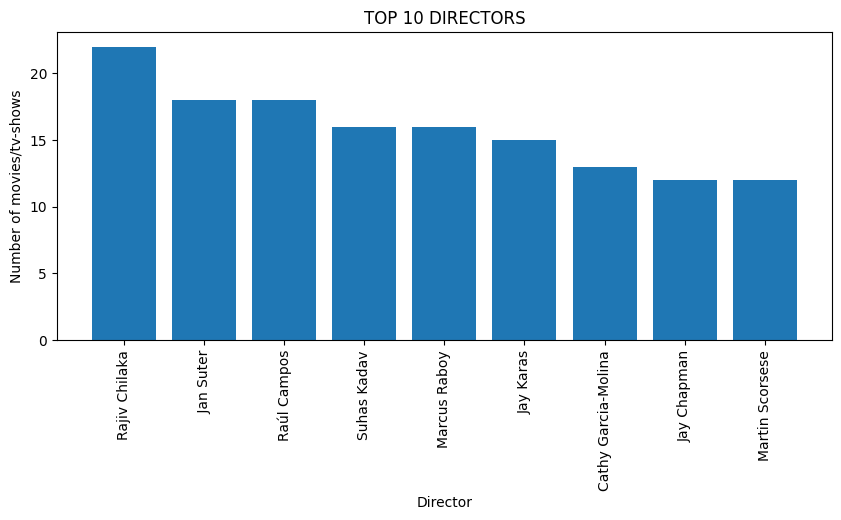

In [29]:
df_dir = df.copy()
df_dir['dir'] = df_dir['director'].str.split(',')
df_dir = df_dir.explode('dir').reset_index(drop=True)
topDir = df_dir.groupby('dir')['show_id'].nunique().sort_values(ascending=False)[1:10]
plt.figure(figsize=(10,4))
plt.bar(topDir.index, topDir.values)
plt.xticks(rotation=90)
plt.xlabel("Director")
plt.ylabel("Number of movies/tv-shows")
plt.title("TOP 10 DIRECTORS")
plt.show()


***Rajiv Chilaka is the top director followed by Jan Suter***

# **Which genre movies are more popular**



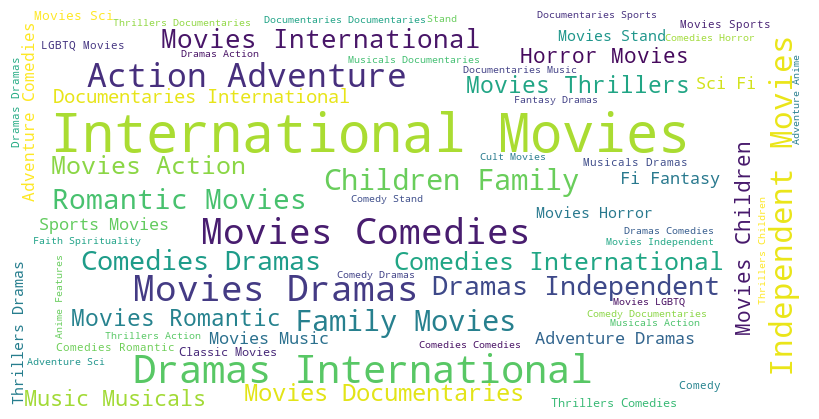

In [30]:
#HERE ALSO UN-NESTING THE "listed_in" COLUMN BECAUSE IT HAVE COMMA SEPARATED VALUES
from wordcloud import WordCloud

dfCon = df.copy()
dfCon = dfCon[dfCon['type']=='Movie']
dfCon["content"] = dfCon['listed_in'].str.split(', ')
dfCon = dfCon.explode('content').reset_index(drop=True)
wordcloud = WordCloud(width = 800, height = 400,
                background_color ='white',
                min_font_size = 10).generate(" ".join(dfCon['content'].tolist()))

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

***From this wordcloud, we can see that Internation Movies, Dramas, Action, Adventure, Comedy are the top Genres.***

# ***Most Popular content in top 2 countries:***

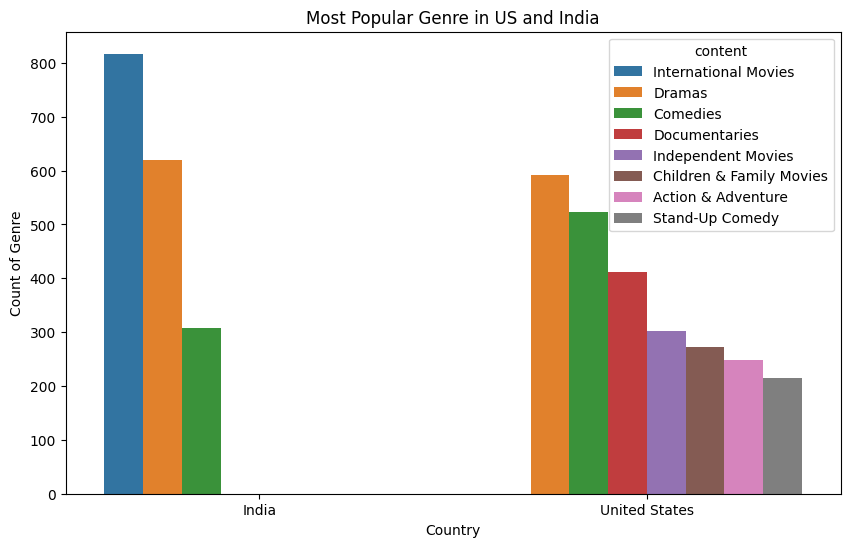

In [31]:
content = pd.DataFrame(dfCon.groupby(['country','content'])['show_id'].nunique().reset_index().sort_values('show_id', ascending=False)).iloc[0:10]
content = content[content['country']!='unknown']
plt.figure(figsize=(10,6))
sns.barplot(x='country',y='show_id', data = content, hue='content')
plt.xlabel("Country")
plt.ylabel("Count of Genre")
plt.title("Most Popular Genre in US and India")
plt.show()

***International movies are most popular in India. whereas, Drama movies are most popular in US***

# **After how many days the movie will be added to Netflix after the release**

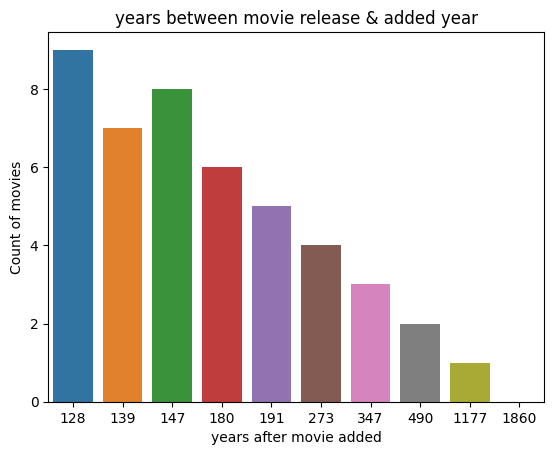

In [34]:
dftime = df.copy()
dftime['time'] = dftime['year']-dftime['release_year'] #DIFFERENCE OF YEAR OF Date_added WITH Release_date
time = dftime[dftime['type']=='Movie']['time'].value_counts().sort_values(ascending=False).reset_index()[0:10]
time
sns.barplot(data=time, x='count',y='time')
plt.xlabel("years after movie added")
plt.ylabel("Count of movies")
plt.title("years between movie release & added year")
plt.show()


***Most movies are added to netflix in the same year as they were released in. This shows that it's best to add the movie to Netflix in the same year as release.***

#**TV show popularity based on number of seasons and Genre -TOP SHOWS IN TOP 5 GENRES**

In [35]:
from collections import Counter

df_tv = df.loc[:,['listed_in','duration','title','type']]
df_tv = df_tv[df_tv['type']=='TV Show'].sort_values('duration', ascending=False)[0:50]
pd.DataFrame(df_tv.groupby(['listed_in', 'duration'])['title'].agg(lambda x: list(x))).reset_index().explode('title')
df_tv['duration'] = df_tv['duration'].apply(lambda x: x.split(" ")[0])
df_tv["listed_in"] = df_tv['listed_in'].str.split(', ')
df_tv = df_tv.explode('listed_in').reset_index(drop=True)

value_counts_df = df_tv.groupby('listed_in').size().reset_index(name='value_counts').sort_values('value_counts', ascending=False).head(5)
df_tv = pd.merge(df_tv, value_counts_df, on='listed_in')

df_tv['frequency']=df_tv.apply(lambda x: int(x['duration'])*[x['title']], axis = 1)
data = df_tv.groupby('listed_in')['frequency'].apply(lambda x: [item for sublist in x for item in sublist]).reset_index()


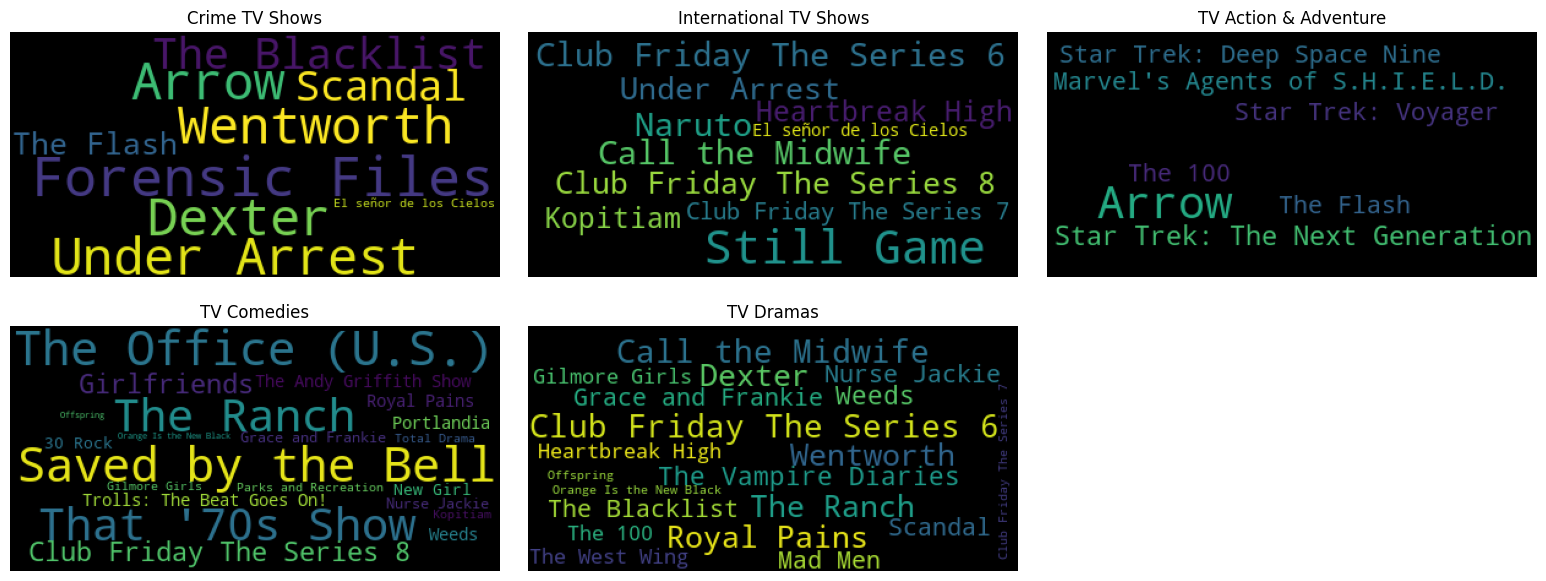

In [36]:
plt.figure(figsize=(20,7))
for idx,row in data.iterrows():
  plt.subplot(2,3,idx+1)
  word_could_dict = Counter(row['frequency'])
  wordcloud = WordCloud().generate_from_frequencies(word_could_dict)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title(row['listed_in'])
plt.subplots_adjust(wspace=0.01)
plt.show()

***Above Wordcloud is formed based on tv shows present in most popular Genres. Also, The tv shows with many seasons(6-9 seasons) are displayed bigger as compared to other shows. So, these wordclouds shows the most popular TV-shows in most popular Genres for TV shows***

**since we do not have much of numerical data to find the correlations between them, Let's see the correlation between year and number of shows produced over the years.**

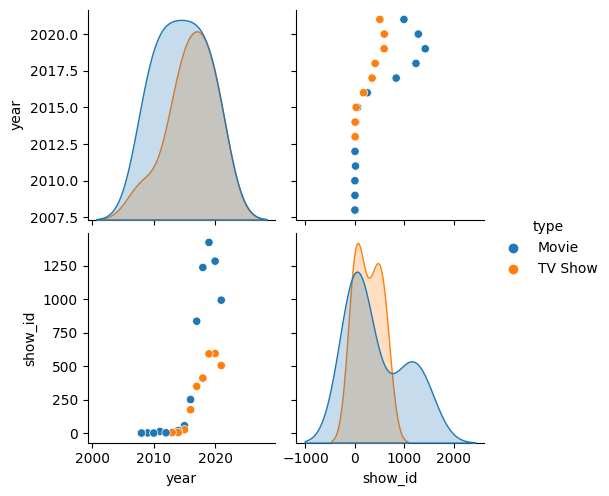

In [37]:
df1 = df.groupby(['year','type'])['show_id'].nunique().sort_values(ascending=False).reset_index()
sns.pairplot(data = df1, hue = 'type')
plt.show()

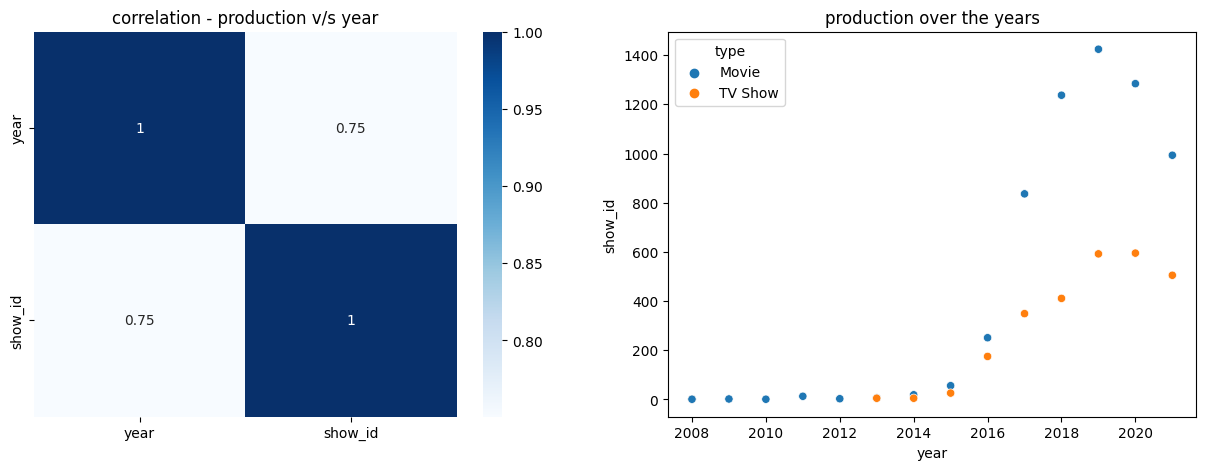

In [40]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
num_cols = [i for i in df1.columns if df1[i].dtypes != 'O']
num_df = df1[num_cols]
sns.heatmap(num_df.corr(), cmap = "Blues", annot=True)
plt.title("correlation - production v/s year")
plt.subplot(1,2,2)
sns.scatterplot(data=df1, x='year',y='show_id', hue='type')
plt.title("production over the years")
plt.show()

***From above graphs, We can see that year and production of shows are positively correlated. The correlation value of 0.75 shows that its in moderate positive side.***

***In scatter plot also, we can see increase in production with increase in the year value***